In [26]:
import pandas as pd
import sklearn as sk


# Path of the file to read
file_path = 'new_filtered.csv'

data  = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [27]:
from sklearn.model_selection import train_test_split

# Combine Title, Text, and Source into one column of strings
data['combined'] =data['Title'].astype(str) + "\n" + data['Text'].astype(str)

text = data['combined']
y = data['Bias']

X_text_train, X_text_test, y_train, y_test = train_test_split(
    text, y, test_size=0.20, random_state=42)


print(X_text_train.shape)  # (num_samples, num_features)
print(y_train.shape)


(2717,)
(2717,)


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# Now use TF-IDF on the combined column
X_train = vectorizer.fit_transform(X_text_train)
X_test = vectorizer.transform(X_text_test)

print(X_train.shape)  # (num_samples, num_features)
print(y_train.shape) 


(2717, 38240)
(2717,)


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [30]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print(accuracy)

print(y_test)
print(predictions)

0.8514705882352941
291           left
2736    lean right
2334         right
432      lean left
479         center
           ...    
572           left
2439          left
3113    lean right
1055          left
765           left
Name: Bias, Length: 680, dtype: object
['left' 'lean right' 'left' 'lean left' 'left' 'left' 'lean right' 'left'
 'left' 'left' 'right' 'left' 'left' 'left' 'left' 'left' 'left' 'right'
 'left' 'lean right' 'left' 'lean left' 'left' 'left' 'left' 'left' 'left'
 'left' 'lean right' 'left' 'right' 'lean right' 'center' 'lean left'
 'left' 'lean right' 'lean right' 'center' 'left' 'left' 'left' 'left'
 'left' 'right' 'lean right' 'left' 'left' 'right' 'right' 'left'
 'lean left' 'left' 'left' 'left' 'right' 'left' 'left' 'right' 'left'
 'lean left' 'left' 'left' 'left' 'left' 'left' 'left' 'left' 'center'
 'lean left' 'lean left' 'right' 'lean right' 'left' 'left' 'left'
 'center' 'left' 'left' 'left' 'left' 'left' 'left' 'right' 'left'
 'lean left' 'left' 'left' '

In [31]:
promptsDF = pd.read_csv('Prompts.csv')
print(promptsDF.describe())
print(promptsDF.head())
print(len(promptsDF))

                                                  Prompts  \
count                                                  25   
unique                                                 25   
top     Report on, in essay form like a news article, ...   
freq                                                    1   

                                                    Sonar  \
count                                                  25   
unique                                                 25   
top     Trump’s Redesignation of the Houthis as a Fore...   
freq                                                    1   

                                                   Claude  \
count                                                  25   
unique                                                 25   
top     Trump Redesignates Houthis as Foreign Terroris...   
freq                                                    1   

                                                      GPT  \
count                

In [39]:
import matplotlib.pyplot as plt
from collections import Counter

def generatePredictionChart(predictions, model_name):
    prediction_counts = Counter(predictions)
    ordered_labels = ['left', 'lean left', 'center', 'lean right', 'right']
    counts = [prediction_counts.get(label, 0) for label in ordered_labels]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(ordered_labels, counts, alpha=0.7, color='steelblue', edgecolor='black')
    plt.title(f'{model_name} Predictions Distribution', fontweight='bold', fontsize=14)
    plt.xlabel('Political Leaning', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    for bar, count in zip(bars, counts):
        if count > 0:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                    str(count), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [42]:
#Chi-Square
from scipy import stats

def chiTest(predictions):
    prediction_counts = Counter(predictions)
    n_predictions = len(predictions)
    categories = ['left', 'lean left', 'center', 'lean right', 'right']
    observed_counts = [prediction_counts.get(cat, 0) for cat in categories]
    expected_uniform = n_predictions / 5
    expected_counts = [expected_uniform] * 5
    
    chi2_stat, chi2_pvalue = stats.chisquare(observed_counts, expected_counts)
    
    print(f"\nChi-square statistic: {chi2_stat:.4f}")
    print(f"p-value: {chi2_pvalue:.6f}")

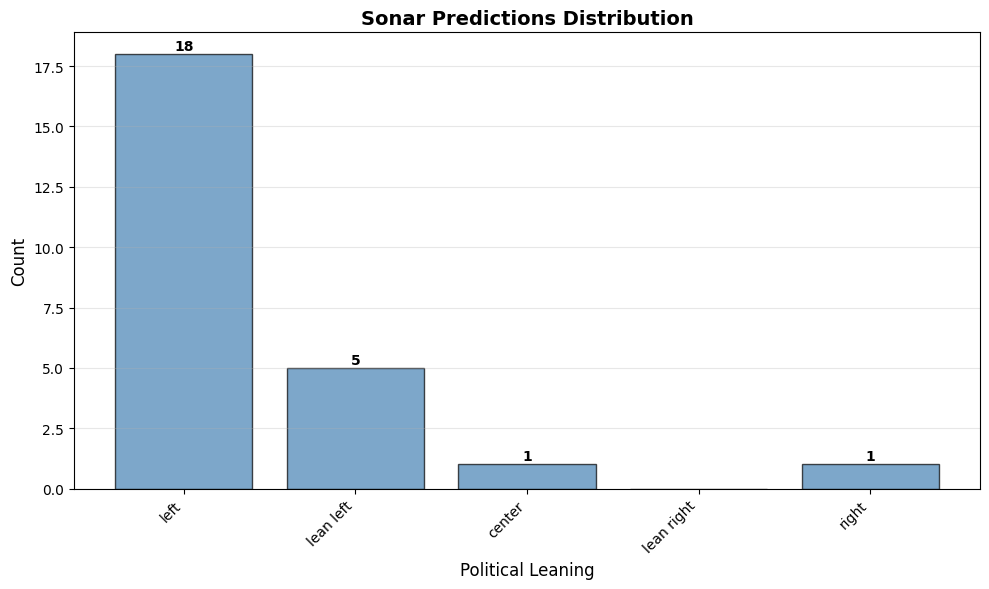


Chi-square statistic: 45.2000
p-value: 0.000000
['left' 'lean left' 'left' 'left' 'left' 'left' 'left' 'lean left' 'right'
 'left' 'left' 'center' 'left' 'left' 'lean left' 'left' 'lean left'
 'left' 'left' 'left' 'left' 'left' 'lean left' 'left' 'left']


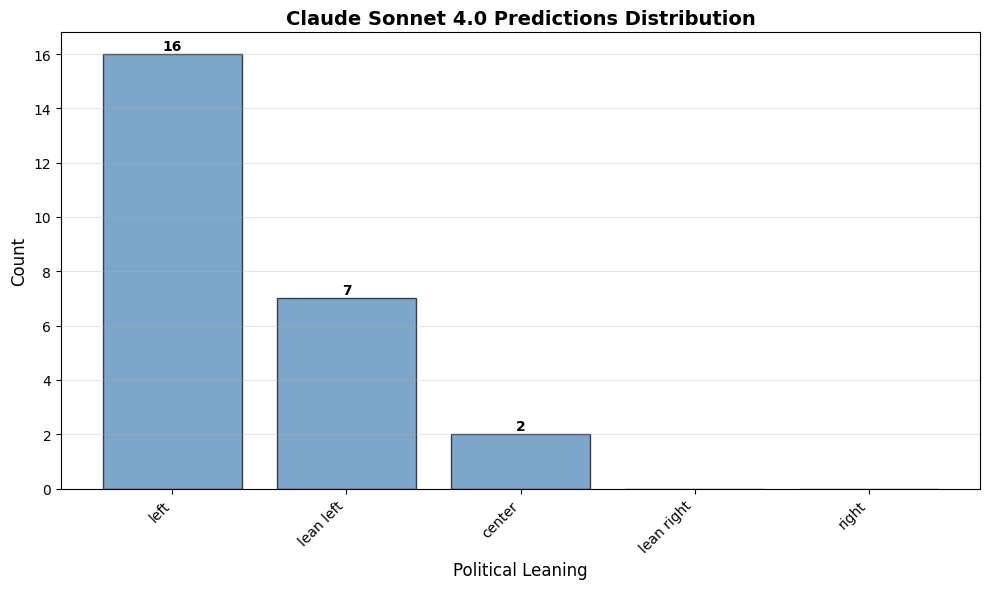


Chi-square statistic: 36.8000
p-value: 0.000000
['lean left' 'lean left' 'left' 'center' 'left' 'left' 'left' 'left'
 'lean left' 'center' 'left' 'left' 'left' 'left' 'lean left' 'left'
 'lean left' 'left' 'left' 'lean left' 'left' 'left' 'left' 'left'
 'lean left']


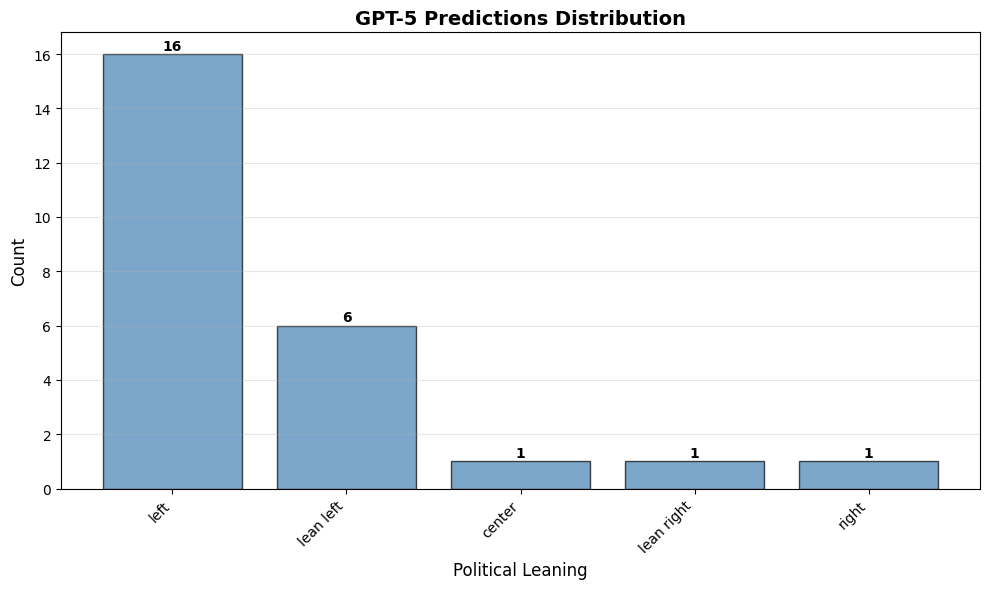


Chi-square statistic: 34.0000
p-value: 0.000001
['right' 'lean left' 'left' 'lean left' 'left' 'left' 'left' 'left' 'left'
 'center' 'left' 'left' 'left' 'left' 'lean left' 'left' 'lean left'
 'left' 'lean right' 'left' 'left' 'left' 'left' 'lean left' 'lean left']


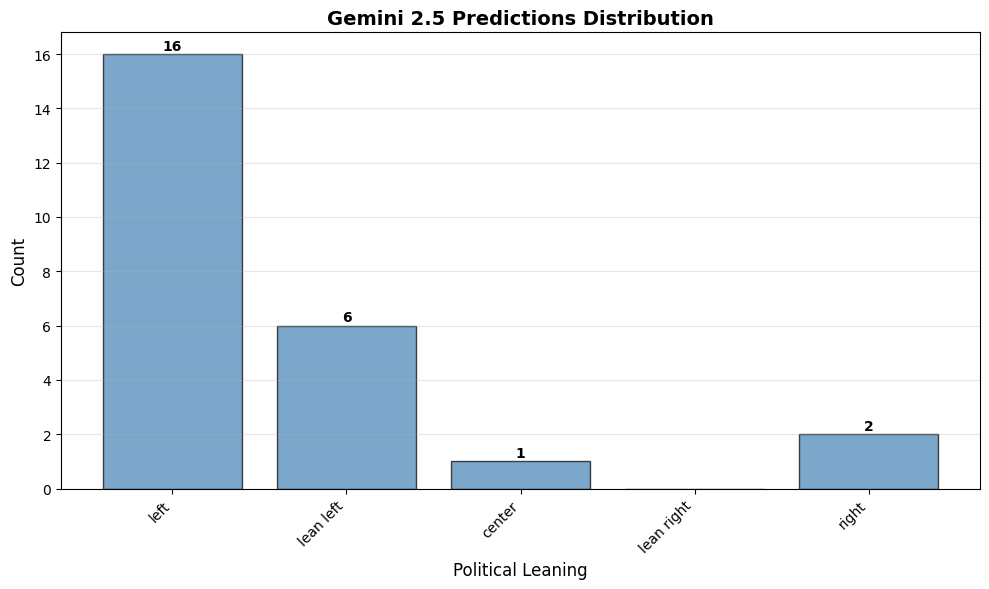


Chi-square statistic: 34.4000
p-value: 0.000001
['left' 'lean left' 'left' 'left' 'left' 'left' 'left' 'left' 'lean left'
 'left' 'left' 'lean left' 'left' 'left' 'lean left' 'left' 'lean left'
 'center' 'left' 'left' 'left' 'right' 'lean left' 'left' 'right']


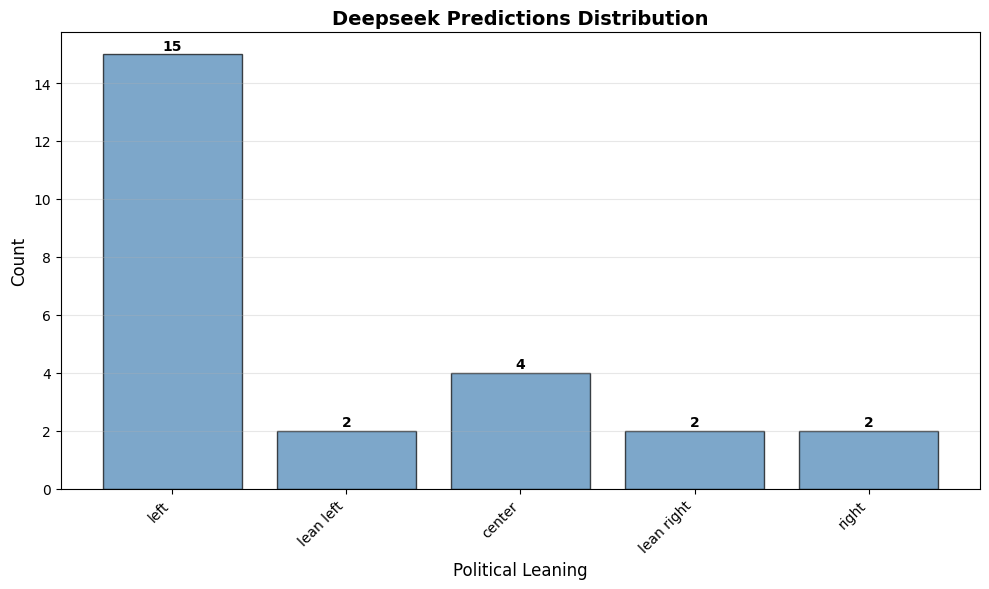


Chi-square statistic: 25.6000
p-value: 0.000038
['left' 'left' 'left' 'lean left' 'left' 'right' 'center' 'left' 'center'
 'center' 'right' 'left' 'lean right' 'left' 'left' 'left' 'lean left'
 'left' 'left' 'left' 'center' 'left' 'left' 'left' 'lean right']


In [43]:
predictions = model.predict(vectorizer.transform(promptsDF['Sonar']))
generatePredictionChart(predictions, "Sonar")
chiTest(predictions)
print(predictions)
predictions = model.predict(vectorizer.transform(promptsDF['Claude']))
generatePredictionChart(predictions, "Claude Sonnet 4.0")
chiTest(predictions)
print(predictions)
predictions = model.predict(vectorizer.transform(promptsDF['GPT']))
generatePredictionChart(predictions, "GPT-5")
chiTest(predictions)
print(predictions)
predictions = model.predict(vectorizer.transform(promptsDF['Gemini']))
generatePredictionChart(predictions, "Gemini 2.5")
chiTest(predictions)
print(predictions)
predictions = model.predict(vectorizer.transform(promptsDF['Deepseek']))
generatePredictionChart(predictions, "Deepseek")
chiTest(predictions)
print(predictions)

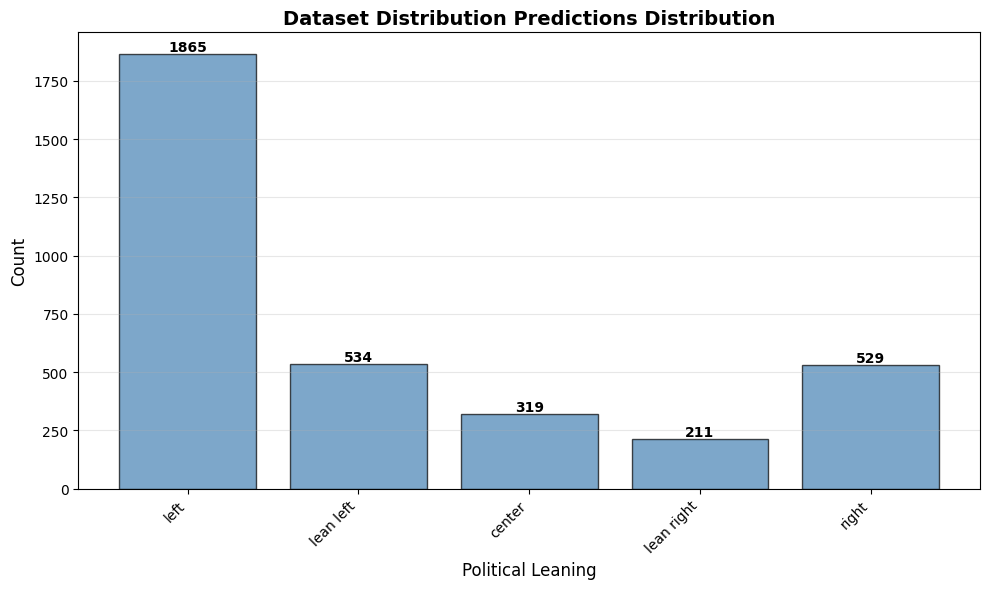

In [41]:
biasDF = pd.read_csv('Political_Bias.csv')
generatePredictionChart(biasDF['Bias'], "Dataset Distribution")